# Substack Visualizations - First Draft


In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/home/cjrisi/Projects/bg_control/eda') # Need to add this to the path so that the script can be imported
from visualizations import andrew_y, anton_r, gavin_k, jonathan_g, julia_z, junwon_p, rebecca_m, safiya_m, sneha_s, tony_c, vilohith_r, yimeng_x

df_500030 = pd.read_csv('../data/500030_2024-07-01_2024-09-30.csv')
df_500030['patient_id'] = 500030
df_500030['date_original'] = df_500030['date']

df_679372 = pd.read_csv('../data/679372_2024-07-01_2024-09-30.csv')
df_679372['patient_id'] = 679372
df_679372['date_original'] = df_679372['date']

df = pd.concat([df_500030, df_679372])
df['interval'] = df['date'].apply(lambda x: x[27:29]) # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19]) # trimming the tail
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

/tmp/ipykernel_137679/2078636797.py:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_679372 = pd.read_csv('../data/679372_2024-07-01_2024-09-30.csv')


## Visualizations

### Andrew Y

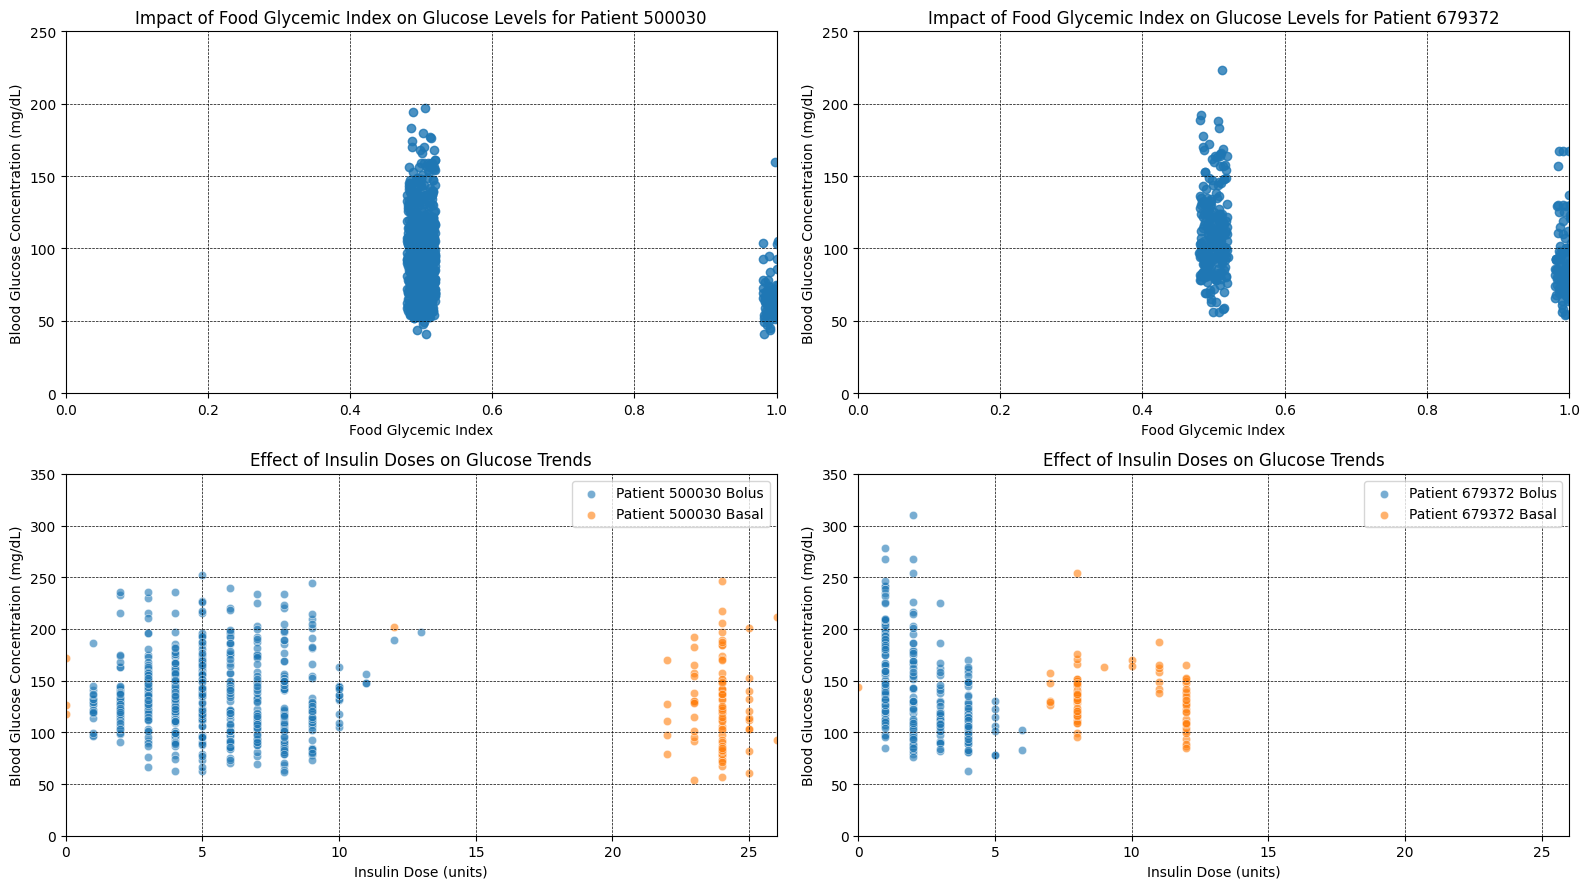

In [2]:
andrew_y(df)

**Notes:** We have made some improvements to the original plots to better convey information. 

1. We have added jitter to the glycemic index plots, this allows us to better understand where teh data is clustering. We should probably also add a line that indicates the median or even better, try this with violin or box plots. 
2. If you're going to plot two patients on the same plot, make sure you have very good reason to do so. 
3. When comparing two individuals with two different plots, make sure the axes are the same dimensions! It's hard to understand the differences in the data when the each axis isn't showing the same information.
4. Whenever you plot something and see the non-random separation of data, investigate this further, there could be extra valuable information that you aren't including. In this case it was the difference between a bolus and a basal insulin dose. 
5. We're working with data that comes in many different units, always add things like (mg/dL) or (mmol/L)


What other improvements could we make to these plots? 

### Anton

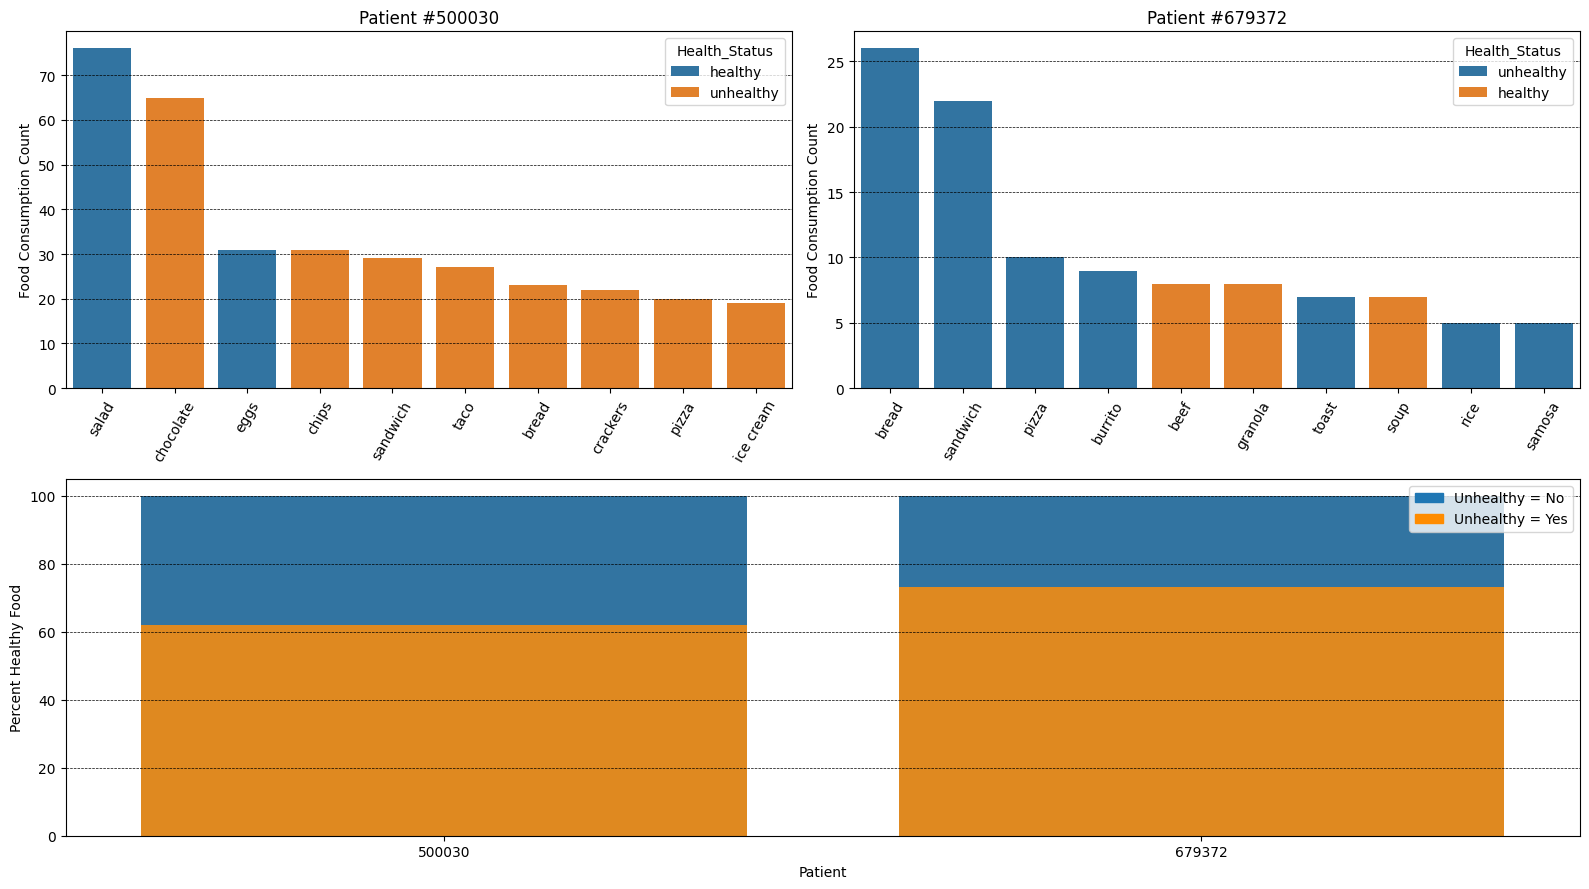

In [3]:
anton_r(df)

**Notes:** We have made some improvements to the original plots to better convey information. 

1. The colours are no longer red and green! The issue with red and green is that it's the most common form of colour blindness and makes your plots inaccessible to many people. Orange and blue tends to be a better habit for data display. It is also more attention grabbing to humans!
2. Avoid pie charts unless you have very good reason to use them. Pie charts are less immediately interpretable from the visualization alone. Any pie chart is just a stacked bar chart spun into a circle. You're better off creating a stacked bar chart with labelled axis.

**Further Improvements:**
1. Add the percentage lables for the healthy percentage bar chart.
2. Make the bottom bar chart horizontal. The bars are too wide for the aspect ratio.
3. Make the colours for the top left and top right plots correspond to the same category.
4. The code is a bit disorganized after my changes, try to simplify it and improve organization with some comments.

### Gavin

Patient 500030


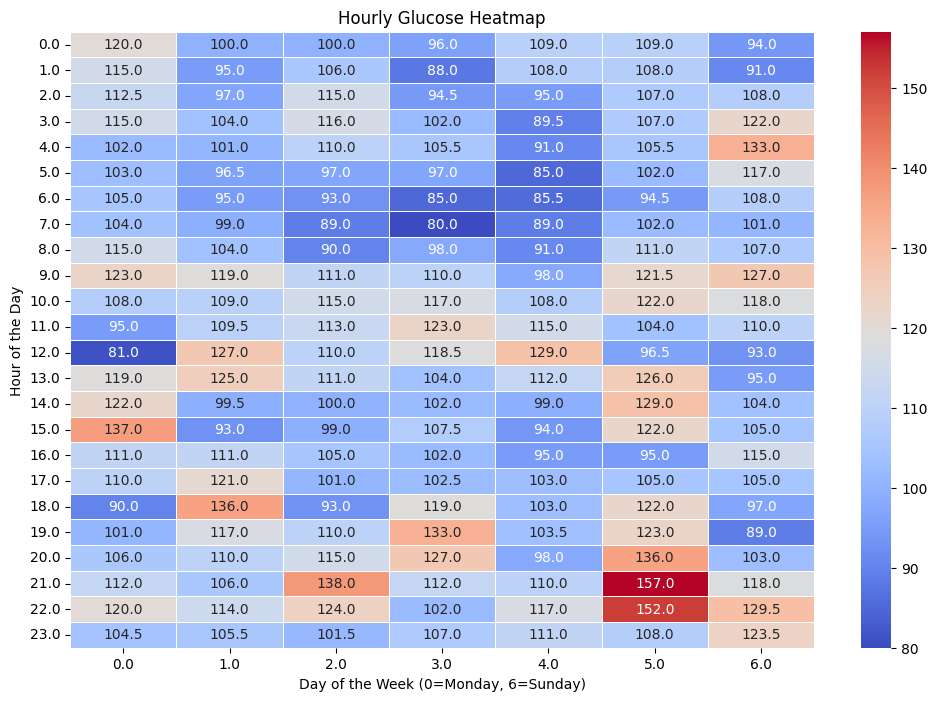

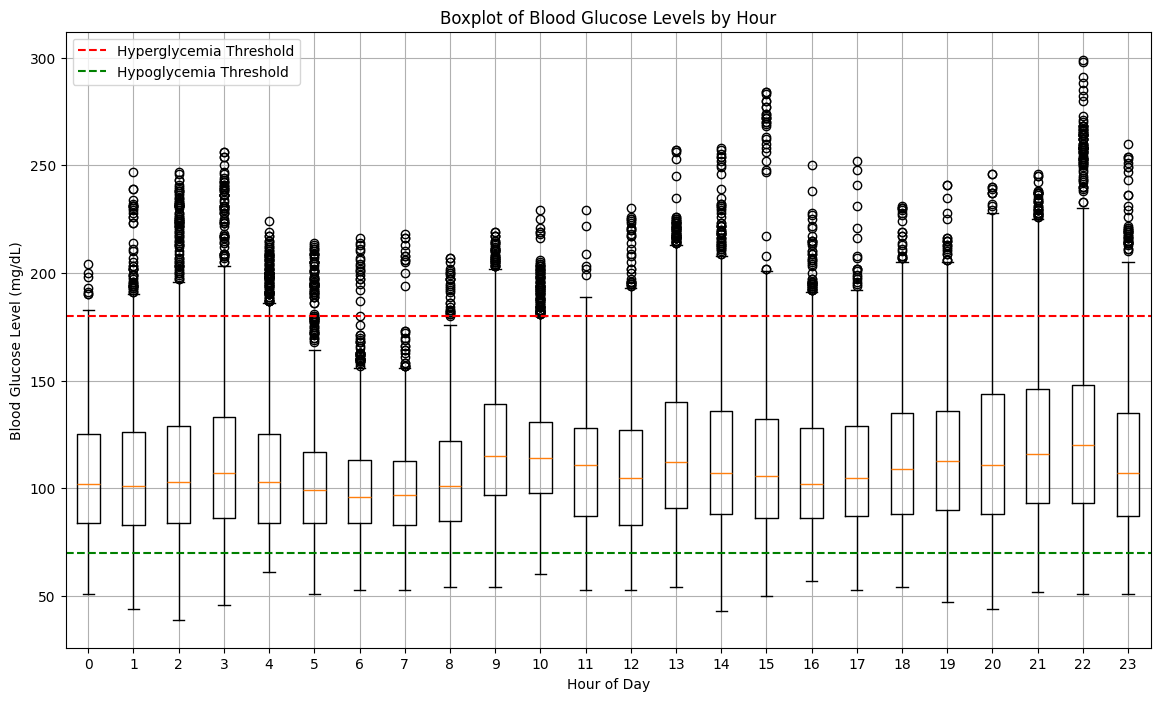

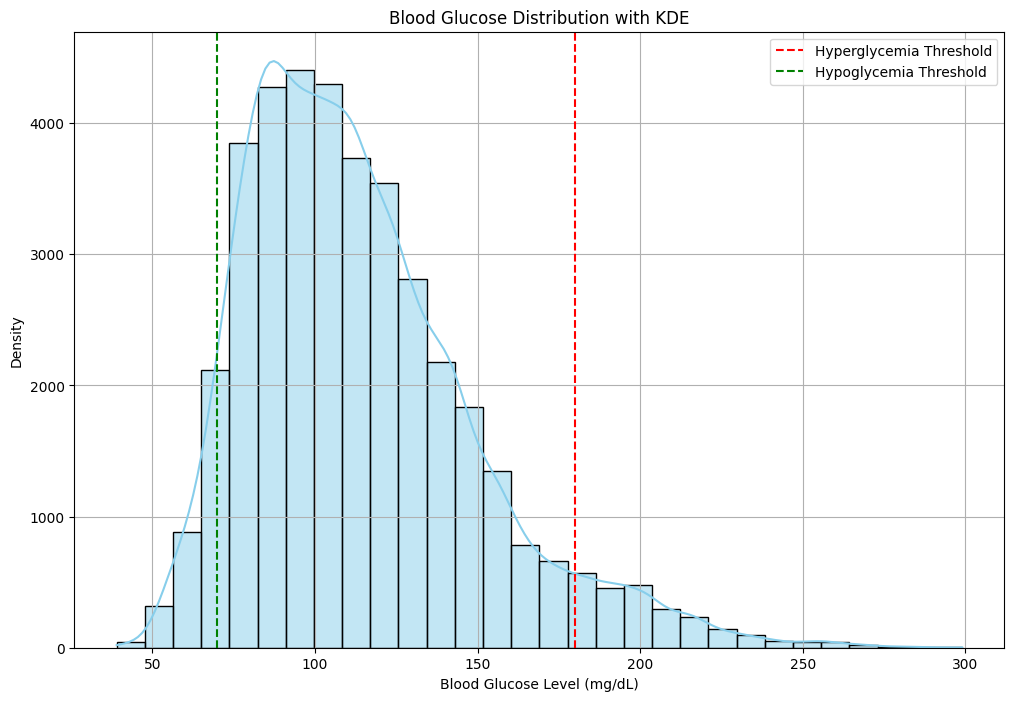

Patient 679372


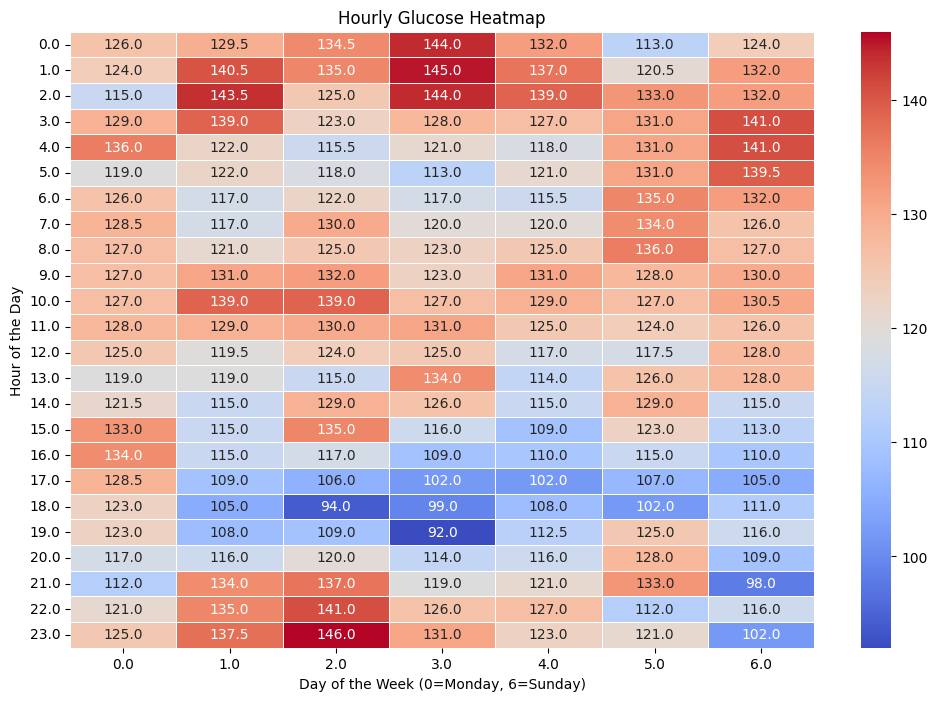

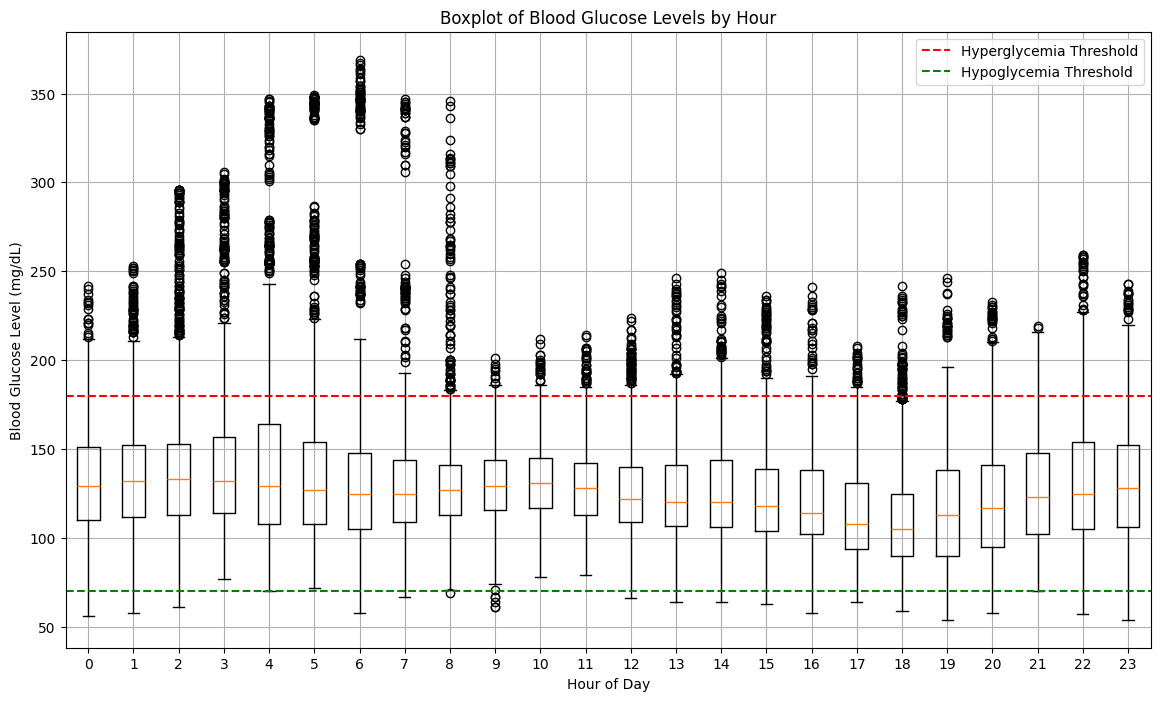

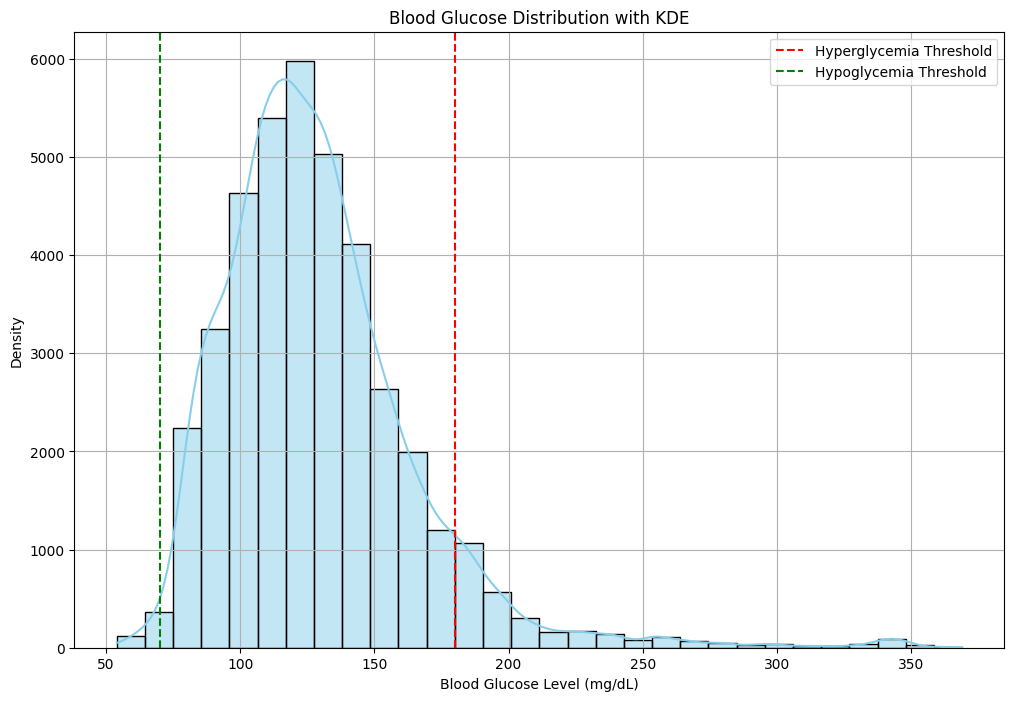

In [4]:
print("Patient 500030")
gavin_k(df_500030)
print("Patient 679372")
gavin_k(df_679372)

**Notes:** We have made some improvements to the original plots to better convey information. 
1. The main issue with these plots is that they combined patient data into a single plot so it made them uniterpretable. Stylistically, and the information they are displaying is fantastic though. So we separated them out.
2. The one thing we changed for the heatmap is to show the median instead of the mean values for the hour of the day. 
3. We need to be cautious about the boxplots! It looks like there's a ton of data in the outliers but this can correspond to a single event because there are readings every two minutes. So in a way we're mixing minute-by-minute information with hourly information. It will be a bit challenging for people to understand this.

**Further Improvements**
1. The heatmap plot is very interetsing, I'd like to see the labels be M,T,W,Th,F,Sat,Sun. 
2. For the heatmap I would like the colour scales to correspond to more meaningful ranges. So the intersection of Time in Tight Range and Time in Range, as well as very low, low, high and very high. 
3. The box plots look cool, and are the right idea, but maybe we can recreate the percentile line charts? One line corresponds to the median, one for each of the 5th, 25th, 75th, and 95th percentiles.
4. Make the distribution plots actually densities intead of counts. 
5. Make the axis be consistently between 0 and 400.



### Jonathan

In [ ]:
jonathan_g(df_500030, 500030)

jonathan_g(df_679372, 679372)

Please add your Derivative BGL plot

The derivative plot is a fantastic idea, and it gives us a picture of where we expect meals to be from the blood glucose trace. We need to be careful with this though becasue our data has irregular sampling frequency depending on the current blood glucose level. To make these plots more meaningful we need to manipulate the data so that each reading corresponds to a 5 minute time window and drop the extra data, and have NaNs for data that is missing. For the missing data we must do various forms of imputation.

**Further Improvements**
1. Fix the time interval of the data to be every 5 minutes.
2. For the differences, we should look at what smoothing techniques we can do, essentially we only want the major signals so we will need to put this through a high-pass filter and see where the spikes are occuring. 


### Julia

Please add your 5 minute average rate of ghance, adn the CVGA Plolt!

In [ ]:
julia_z(df_500030, df_679372)


### Junwon

Please add your derivative plot

In [ ]:
junwon_p(df_500030, df_679372)


### Rebecca

Please add the aggregated avearage of postmeal and post insulin plots

In [ ]:
rebecca_m(df_500030, df_679372)


### Safiya

1. Finger prick calibration plot, (maybe add a min/max of the cgm reading over a 20 minute window?)
2. Time to reslove plot.

In [ ]:
safiya_m(df_500030, df_679372)


### Sneha

I liked the distribution plot, and the time of day box plots, please add those.

In [ ]:
sneha_s(df_500030, df_679372)


### Tony

Distribtuion of high and lows plot, as well as AVG BGL change plot!

In [ ]:
tony_c(df_500030, df_679372)


### Vilohith

Blood Glucose labelled trace.

In [ ]:
vilohith_r(df_500030, df_679372)


### Yimeng

Radial plot (potential watch face), counts of messages to help infer night time forecasting windows.

In [ ]:
yimeng_x(df_500030, df_679372)
